# Exercise No. 2 Time Series Analysis:
Please create a time series from the 2017 expense data and use a visualization to show the expense quantity trend.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df1 = pd.read_csv("Expense Data 1.csv")

In [3]:
df2 = pd.read_csv("Expense Amount Data 1.csv")

In [4]:
df1

,Expense Code,Month,Expense Quantity,Government Entity
0,10003,42948,1530,Ministry of Education
1,10003,42979,3060,Ministry of Education
2,10007,42917,1792,Ministry of Health
3,10007,42979,2048,Ministry of Health
4,10007,43132,1024,Ministry of Health
...,...,...,...,...
17080,9990,42856,2700,Ministry of Health
17081,9990,43160,100,Ministry of Health
17082,9996,42826,7800,Ministry of Energy
17083,9996,43009,5200,Ministry of Energy


In [5]:
df2

,Expense Code,Expense Amount (SAR)
0,10532,4.46
1,10640,6.84
2,11053,0.36
3,11291,2.47
4,11436,1.70
...,...,...
3782,9827,10.45
3783,9838,4.41
3784,9859,5.12
3785,9920,0.42


# Data cleaning and processing
Data Integration and Demand Analysis

Merging the DataFrames on 'Expense Code'

In [6]:
merged = pd.merge(df1, df2, on='Expense Code', how='outer')

# Display the merged DataFrame
print(merged)

       Expense Code  Month Expense Quantity      Government Entity  \
0             10003  42948             1530  Ministry of Education   
1             10003  42979             3060  Ministry of Education   
2             10007  42917             1792     Ministry of Health   
3             10007  42979             2048     Ministry of Health   
4             10007  43132             1024     Ministry of Health   
...             ...    ...              ...                    ...   
17080          9990  42856             2700     Ministry of Health   
17081          9990  43160              100     Ministry of Health   
17082          9996  42826             7800     Ministry of Energy   
17083          9996  43009             5200     Ministry of Energy   
17084          9996  43191             7800     Ministry of Energy   

       Expense Amount (SAR)  
0                      4.48  
1                      4.48  
2                      8.82  
3                      8.82  
4        

In [7]:
df=merged
df

,Expense Code,Month,Expense Quantity,Government Entity,Expense Amount (SAR)
0,10003,42948,1530,Ministry of Education,4.48
1,10003,42979,3060,Ministry of Education,4.48
2,10007,42917,1792,Ministry of Health,8.82
3,10007,42979,2048,Ministry of Health,8.82
4,10007,43132,1024,Ministry of Health,8.82
...,...,...,...,...,...
17080,9990,42856,2700,Ministry of Health,3.63
17081,9990,43160,100,Ministry of Health,3.63
17082,9996,42826,7800,Ministry of Energy,9.84
17083,9996,43009,5200,Ministry of Energy,9.84


In [8]:
df.shape

(17085, 5)

# Information about dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expense Code          17085 non-null  int64  
 1   Month                 17085 non-null  object 
 2   Expense Quantity      17083 non-null  object 
 3   Government Entity     17085 non-null  object 
 4   Expense Amount (SAR)  17085 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 800.9+ KB


In [10]:
df.isna().sum()

Expense Code            0
Month                   0
Expense Quantity        2
Government Entity       0
Expense Amount (SAR)    0
dtype: int64

In [11]:
df = df.fillna(method = 'pad')

In [12]:
df.isna().sum()

Expense Code            0
Month                   0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
# Check for duplicates and drop them
df = df.drop_duplicates()

# Data Preprocessing
Convert the string to an integer Convert the Month to datetime64 and Added a new column named "Date"

In [15]:
# Convert the string to an integer
df['Expense Quantity'] = pd.to_numeric(df['Expense Quantity'], errors='coerce').fillna(0, downcast='infer')

In [16]:
# Convert the Month
df['Date']=pd.to_datetime(pd.to_numeric(df['Month'],errors='coerce'),errors='coerce',origin='1899-12-30',unit='D')

df['Date']

0       2017-08-01
1       2017-09-01
2       2017-07-01
3       2017-09-01
4       2018-02-01
           ...    
17080   2017-05-01
17081   2018-03-01
17082   2017-04-01
17083   2017-10-01
17084   2018-04-01
Name: Date, Length: 17085, dtype: datetime64[ns]

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df = df.sort_values(by='Date')
df

,Expense Code,Month,Expense Quantity,Government Entity,Expense Amount (SAR),Date
14927,4813,42826,4728,Ministry of Health,2.18,2017-04-01
6620,21550,42826,11200,Ministry of Education,5.96,2017-04-01
12779,2308,42826,2412,Ministry of Energy,5.53,2017-04-01
9779,344,42826,1188,Ministry of Energy,5.01,2017-04-01
1309,13431,42826,40,Ministry of Health,7.78,2017-04-01
...,...,...,...,...,...,...
8603,23228,43221,450,Ministry of Education,3.00,2018-05-01
8478,23173,43221,312,Ministry of Health,3.93,2018-05-01
8543,23201,43221,4800,Ministry of Education,3.75,2018-05-01
679,12083,9/1/2017000,4692,Ministry of Education,6.32,NaT


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 14927 to 4492
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Month                 17085 non-null  object        
 2   Expense Quantity      17085 non-null  int64         
 3   Government Entity     17085 non-null  object        
 4   Expense Amount (SAR)  17085 non-null  float64       
 5   Date                  17083 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 934.3+ KB


drop column "Month"

In [20]:
df.drop('Month',axis = 1 , inplace = True)

In [21]:
df= df.fillna(method = 'pad')

In [22]:
df.isna().sum()

Expense Code            0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
Date                    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 14927 to 4492
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Expense Quantity      17085 non-null  int64         
 2   Government Entity     17085 non-null  object        
 3   Expense Amount (SAR)  17085 non-null  float64       
 4   Date                  17085 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 800.9+ KB


In [24]:
df.duplicated().sum()

0

In [25]:
df.head()

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR),Date
14927,4813,4728,Ministry of Health,2.18,2017-04-01
6620,21550,11200,Ministry of Education,5.96,2017-04-01
12779,2308,2412,Ministry of Energy,5.53,2017-04-01
9779,344,1188,Ministry of Energy,5.01,2017-04-01
1309,13431,40,Ministry of Health,7.78,2017-04-01


# Exploratory Data Analysis (EDA)
Time series from the 2017 expense data
Filter data for the year 2017

seaborn style

Plot the time series of expense quantity

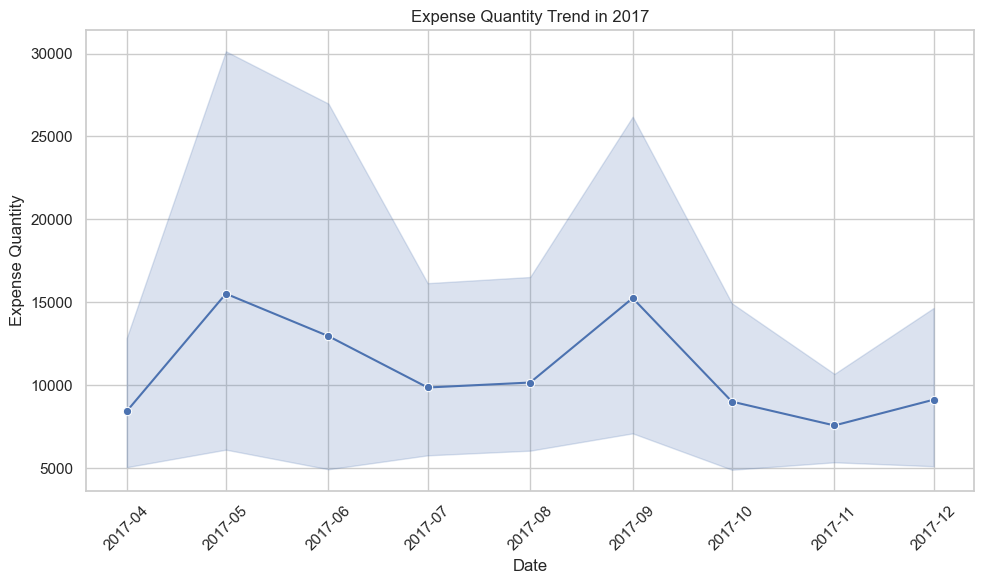

In [26]:
# Filter data for the year 2017
df_2017 = df[df['Date'].dt.year == 2017]

# Set the seaborn style
sns.set(style="whitegrid")

# Plot the time series of expense quantity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_2017, x='Date', y='Expense Quantity', marker='o')

plt.title('Expense Quantity Trend in 2017')
plt.xlabel('Date')
plt.ylabel('Expense Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

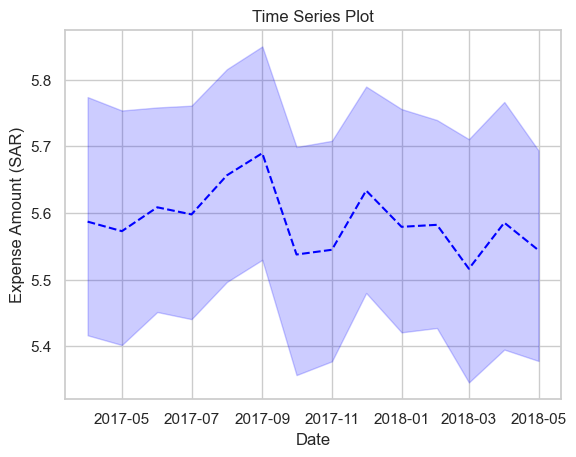

In [27]:
#Plotting the time series data:
sns.lineplot(x='Date', y='Expense Amount (SAR)', data=df, color='blue', linestyle='--' )
plt.grid(True)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Expense Amount (SAR)')
plt.show()

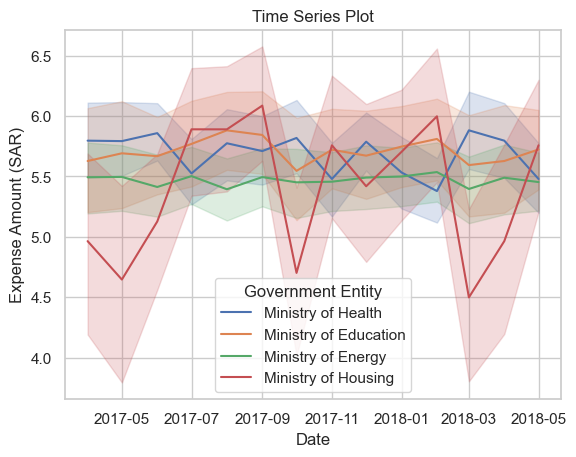

In [28]:
sns.lineplot(x='Date', y='Expense Amount (SAR)', hue='Government Entity', data=df)
plt.grid(True)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Expense Amount (SAR)')
plt.show()

# Index Date

In [29]:
df = df.set_index(['Date'])
df

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR)
Date,,,,
2017-04-01,4813,4728,Ministry of Health,2.18
2017-04-01,21550,11200,Ministry of Education,5.96
2017-04-01,2308,2412,Ministry of Energy,5.53
2017-04-01,344,1188,Ministry of Energy,5.01
2017-04-01,13431,40,Ministry of Health,7.78
...,...,...,...,...
2018-05-01,23228,450,Ministry of Education,3.00
2018-05-01,23173,312,Ministry of Health,3.93
2018-05-01,23201,4800,Ministry of Education,3.75


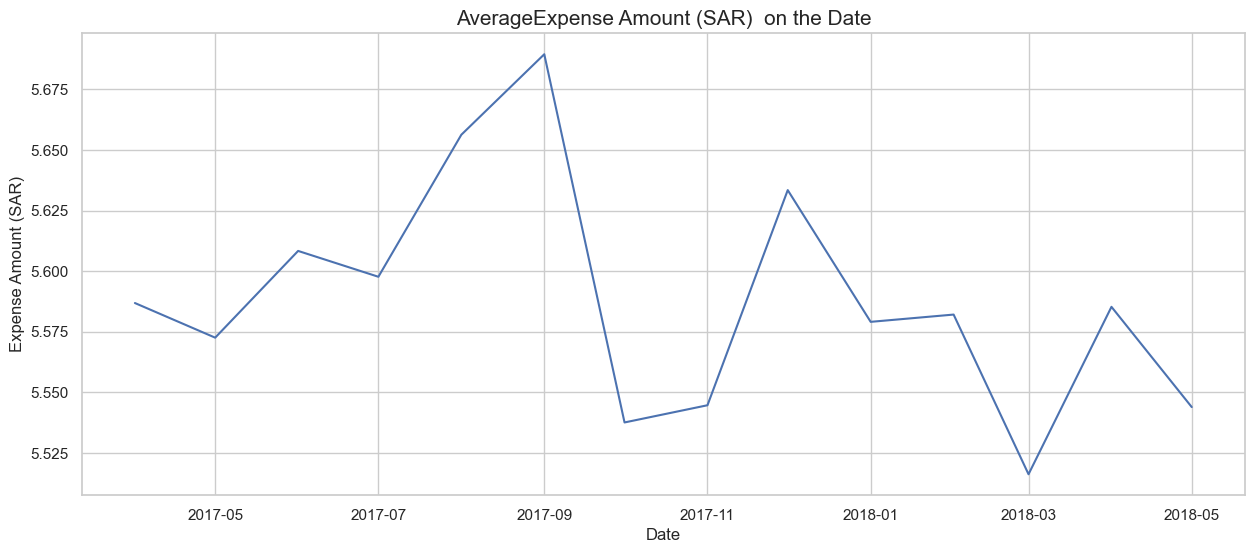

In [30]:
df_temp = df.groupby(['Date'])['Expense Amount (SAR)'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="Date", y="Expense Amount (SAR)", data=df_temp).set_title("AverageExpense Amount (SAR)  on the Date",fontsize=15)

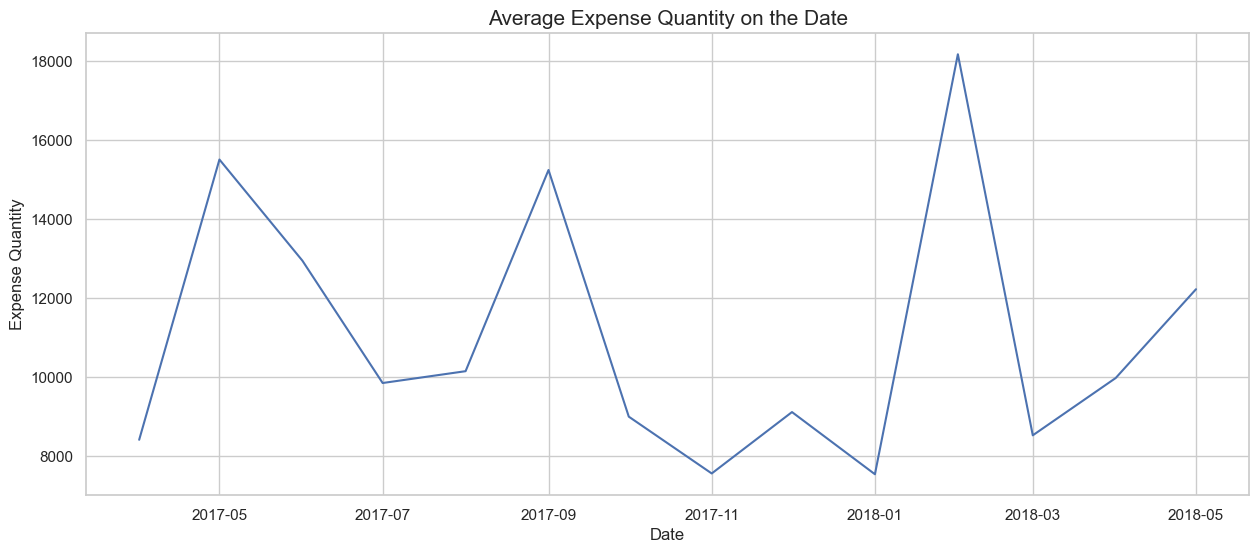

In [31]:
df_temp =df.groupby(['Date'])['Expense Quantity'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="Date", y="Expense Quantity", data=df_temp).set_title("Average Expense Quantity on the Date",fontsize=15)